In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('insurance.csv')
ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='bmi', ylabel='charges'>

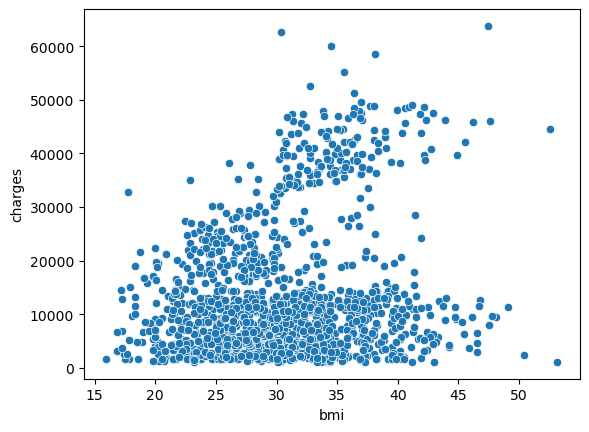

In [3]:
sns.scatterplot(x=ds['bmi'], y=ds['charges'])


<Axes: xlabel='bmi', ylabel='charges'>

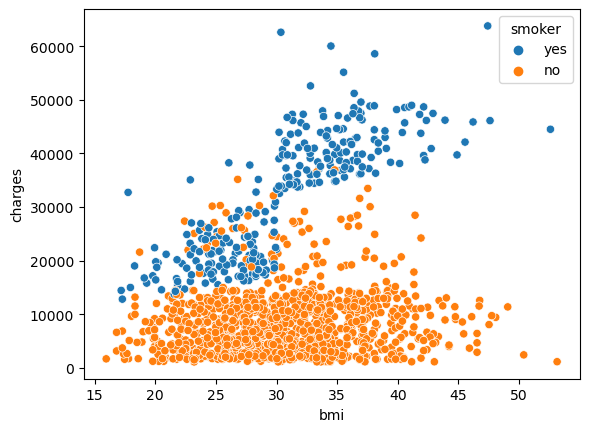

In [4]:

sns.scatterplot(x=ds['bmi'], y=ds['charges'], hue=ds['smoker'])



In [5]:
des = pd.qcut(ds['age'], q= 4).head()
des

0    (17.999, 27.0]
1    (17.999, 27.0]
2      (27.0, 39.0]
3      (27.0, 39.0]
4      (27.0, 39.0]
Name: age, dtype: category
Categories (4, interval[float64, right]): [(17.999, 27.0] < (27.0, 39.0] < (39.0, 51.0] < (51.0, 64.0]]

In [6]:
ds['age'] = pd.qcut(ds['age'], q=4, labels=['Low', 'MEDIUM', 'HIGH', 'VERY HIGH'])
ds['age'].head()


0       Low
1       Low
2    MEDIUM
3    MEDIUM
4    MEDIUM
Name: age, dtype: category
Categories (4, object): ['Low' < 'MEDIUM' < 'HIGH' < 'VERY HIGH']

In [7]:
# pd.cut(ds['age'], bins=[18, 10, 61]) 
# pd.cut(ds['age'], bins=[0, 10, 50, 100, 1000], labels=[1,2,3,4]) 

In [8]:
x = ds.keys()
x

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
print(ds['age'])

0             Low
1             Low
2          MEDIUM
3          MEDIUM
4          MEDIUM
          ...    
1333         HIGH
1334          Low
1335          Low
1336          Low
1337    VERY HIGH
Name: age, Length: 1338, dtype: category
Categories (4, object): ['Low' < 'MEDIUM' < 'HIGH' < 'VERY HIGH']


In [10]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
numerical_cols = ds.select_dtypes(include=[np.number])
numerical_cols
pca_result = pca.fit_transform(numerical_cols)


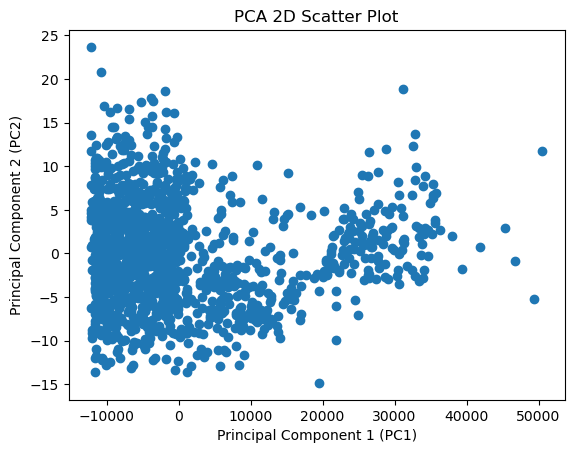

In [11]:
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA 2D Scatter Plot')
plt.show()